In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import os

In [2]:
df = pd.read_csv('train.csv')
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


#### Distribution of employees across various departments

In [125]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Exploratory Data Analysis

## 1. Univariate Analysis

In [127]:
sns.set()

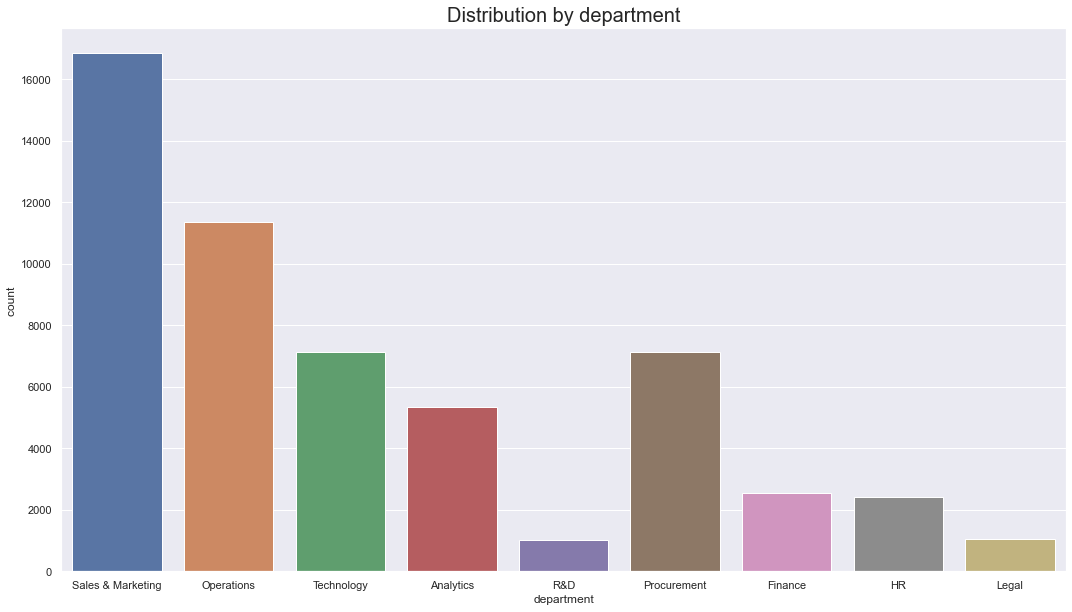

In [128]:
sns.countplot(x='department', data = df)
plt.title("Distribution by department", fontsize = 20)
plt.xlabel("department")
plt.ylabel("count ")
plt.show()

Based on the Bar plot above, we can see that the sales and the Marketing Departmrnt is the Department with more employees

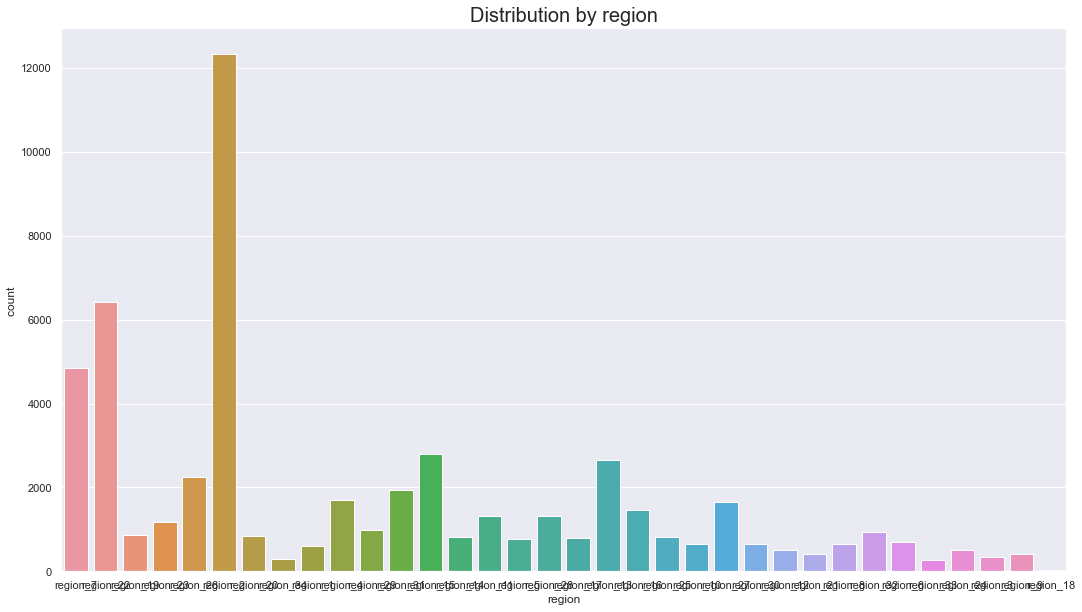

In [129]:
sns.countplot(x='region', data = df)
plt.title("Distribution by region", fontsize = 20)
plt.xlabel("region")
plt.ylabel("count ")
plt.show()

Based on the above plot, we can see that the most employees are in region 

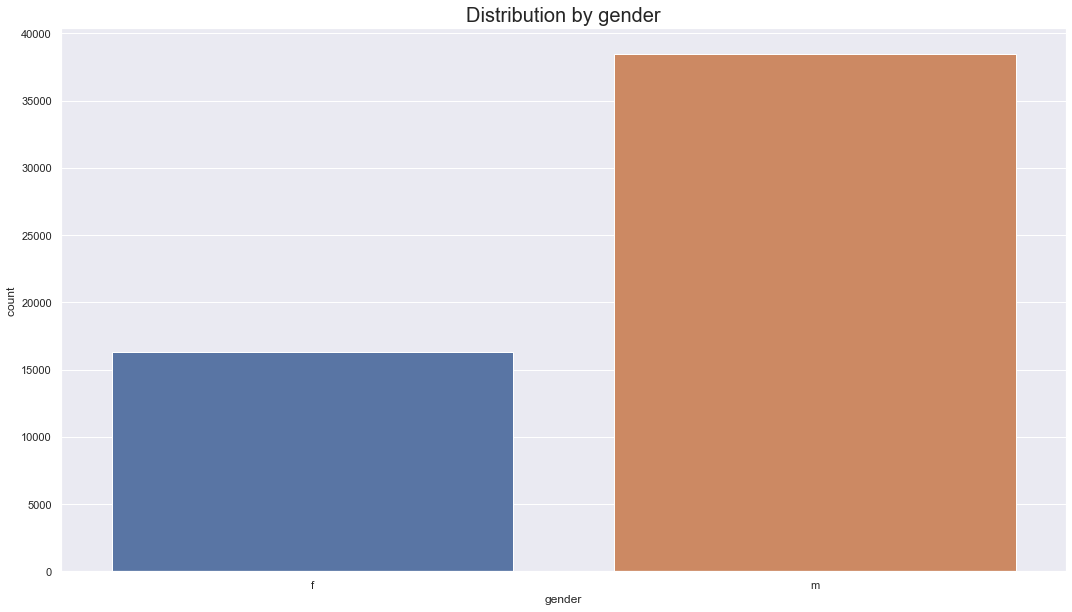

In [130]:
sns.countplot(x='gender', data = df)
plt.title("Distribution by gender", fontsize = 20)
plt.xlabel("gender")
plt.ylabel("count ")
plt.show()

Based on the bar plot above, we can see that the most employees gender is male

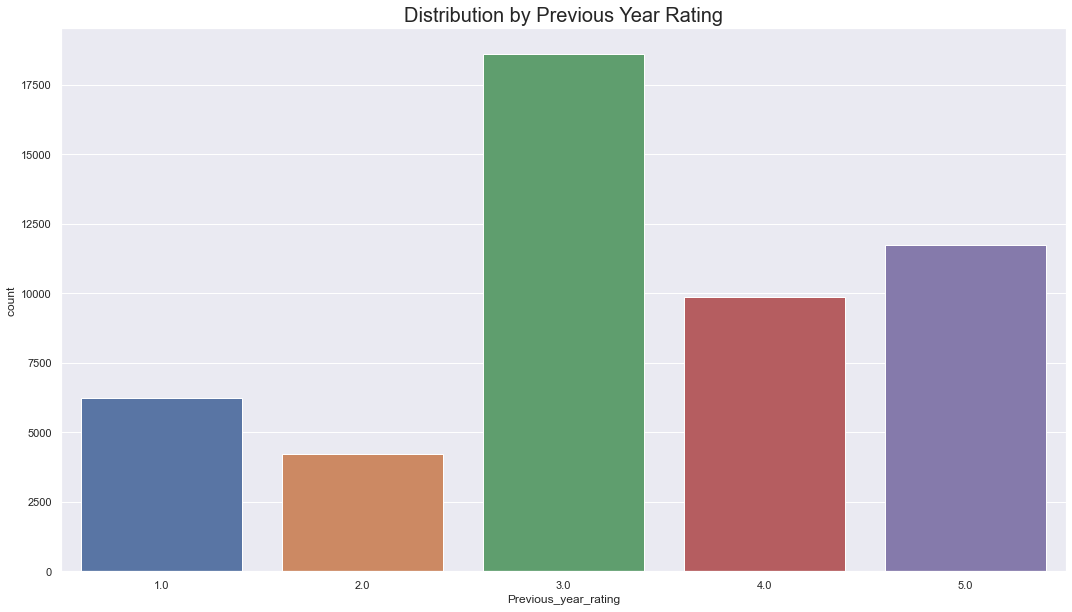

In [131]:
sns.countplot(x='previous_year_rating', data = df)
plt.title("Distribution by Previous Year Rating", fontsize = 20)
plt.xlabel("Previous_year_rating")
plt.ylabel("count ")
plt.show()

Based on the above bar plot, we can see that the most employees rating in 3 rating. 

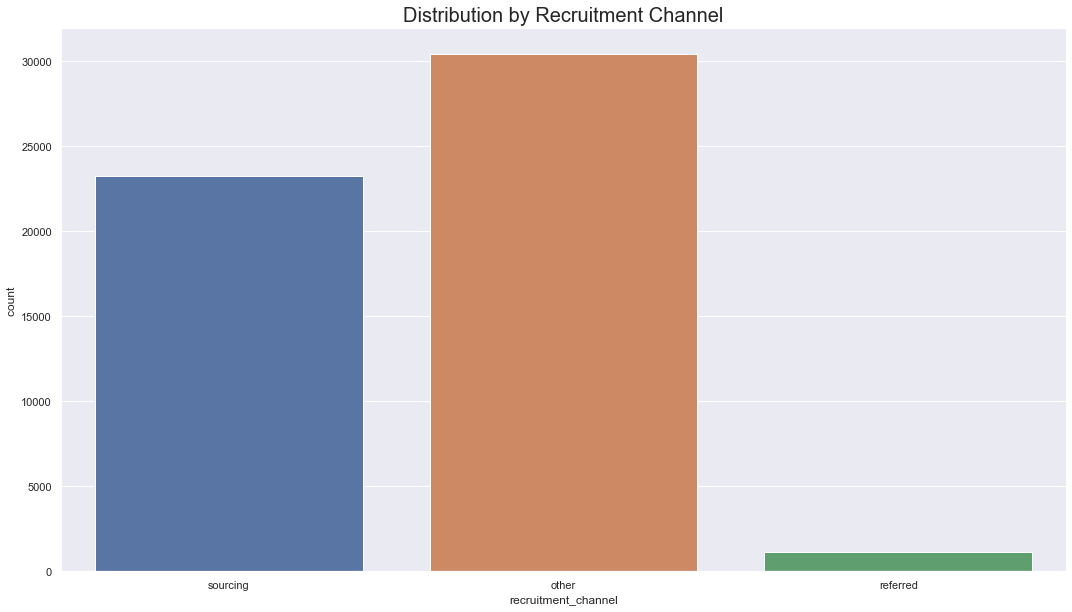

In [132]:
sns.countplot(x='recruitment_channel', data = df)
plt.title("Distribution by Recruitment Channel", fontsize = 20)
plt.xlabel("recruitment_channel")
plt.ylabel("count ")
plt.show()

Based on the bar plot above, we can see that the most recruitment channel is other channel.

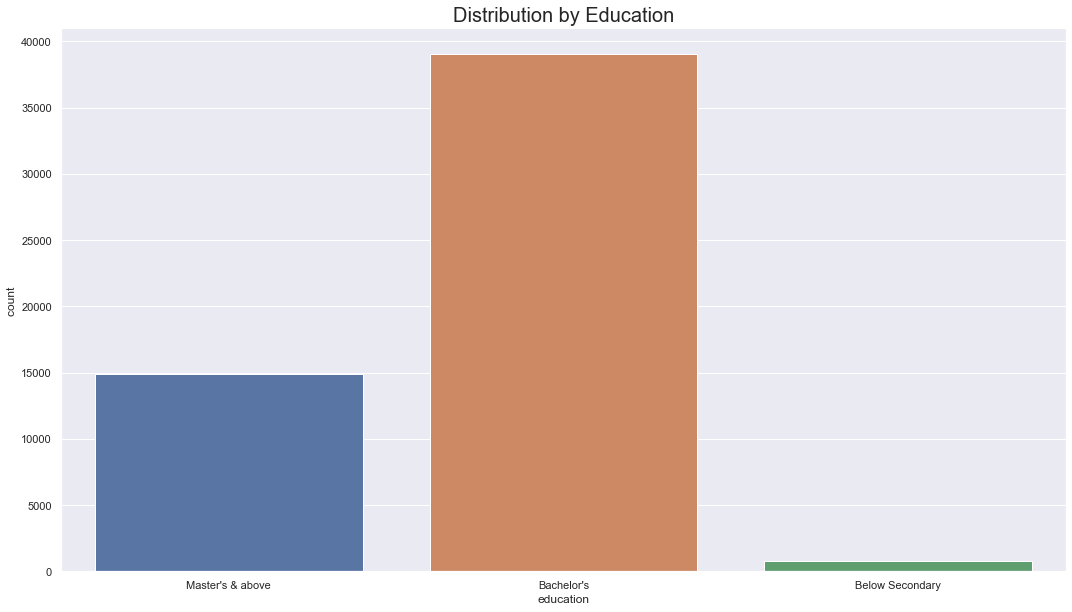

In [184]:
sns.countplot(x='education', data = df)
plt.title("Distribution by Education", fontsize = 20)
plt.xlabel("education")
plt.ylabel("count ")
plt.show()

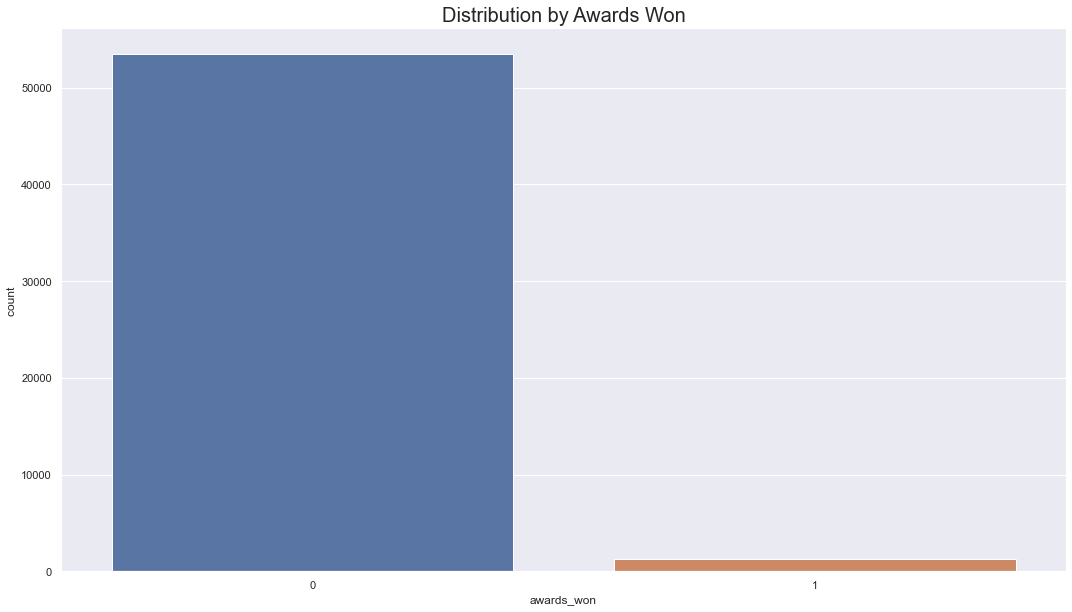

In [134]:
sns.countplot(x='awards_won?', data = df)
plt.title("Distribution by Awards Won", fontsize = 20)
plt.xlabel("awards_won")
plt.ylabel("count ")
plt.show()

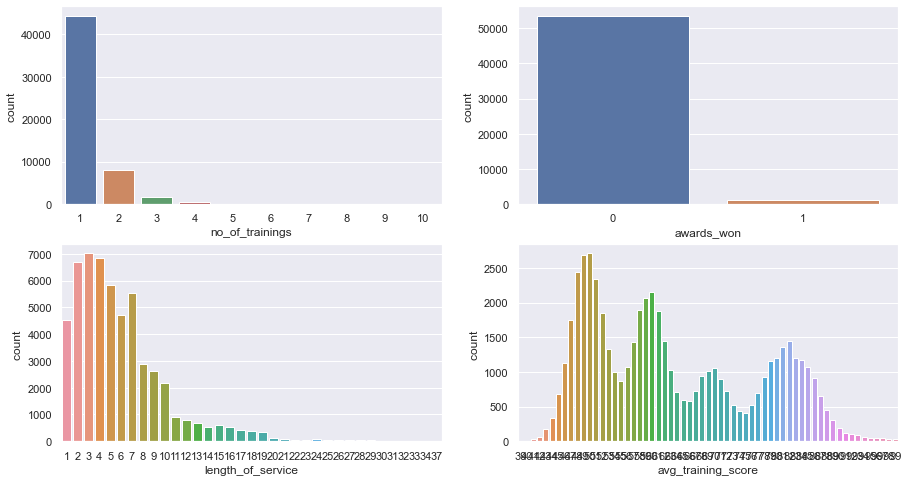

In [135]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(221)
ax1=sns.countplot(x='no_of_trainings', data = df)
#ax1=plt.title("Distribution by no of Trainings", fontsize = 20)
ax1=plt.xlabel("no_of_trainings")
ax1=plt.ylabel("count ")
ax2 = fig.add_subplot(222)
ax2=sns.countplot(x='awards_won?', data = df)
#ax2=plt.title("Distribution by Awards Won", fontsize = 20)
ax2=plt.xlabel("awards_won")
ax2=plt.ylabel("count ")
ax3 = fig.add_subplot(223)
ax3=sns.countplot(x='length_of_service', data = df)
#ax3=plt.title("Distribution by length of service", fontsize = 20)
ax3=plt.xlabel("length_of_service")
ax3=plt.ylabel("count ")
ax4 = fig.add_subplot(224)
ax4=sns.countplot(x='avg_training_score', data = df)
#ax4=plt.title("Distribution by avg_training_score", fontsize = 20)
ax4=plt.xlabel("avg_training_score")
ax4=plt.ylabel("count ")
plt.show()

# Bivariate Analysis

#### Percentage of people who got promoted from each department


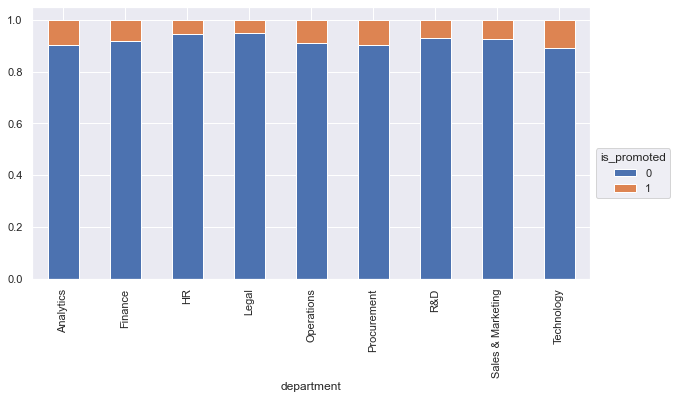

In [137]:
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(df.department,df.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

While Technology department had highest percentage of employees getting promoted, Legal department has the least number. But we don't see major differences in terms of
percentages.
#### Percentage of promotions across all the regions

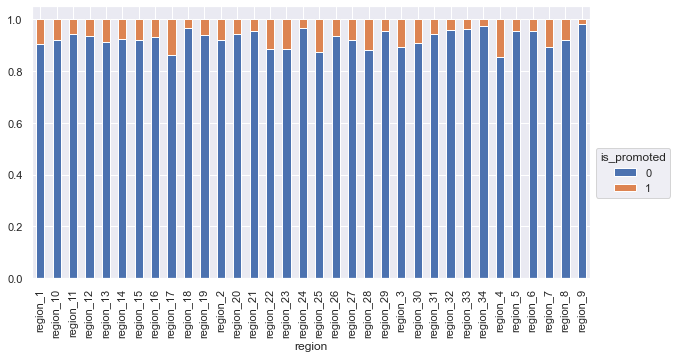

In [138]:
reg = pd.crosstab(df.region,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

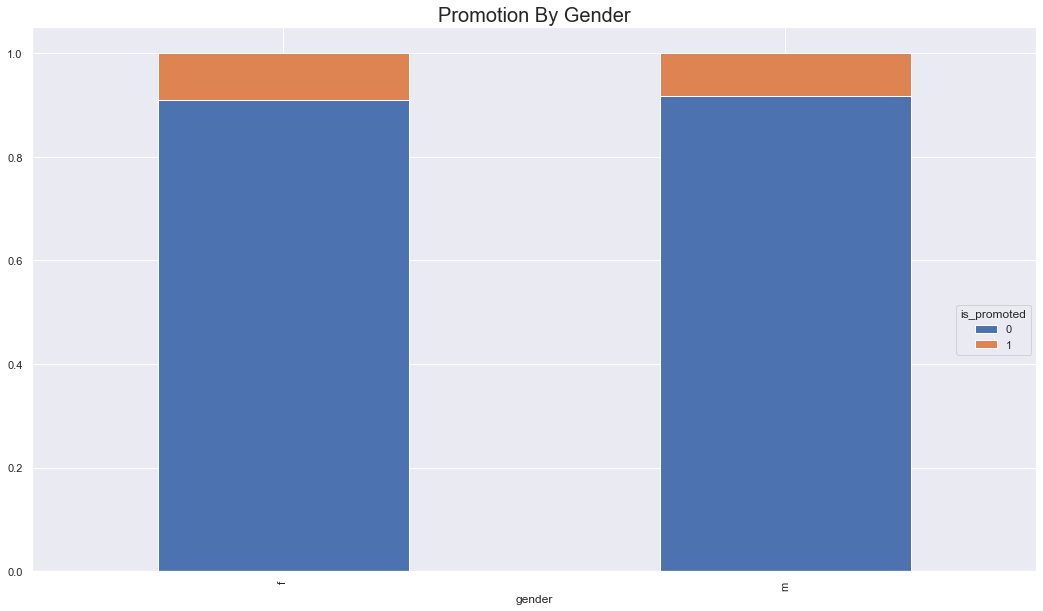

In [188]:
reg = pd.crosstab(df.gender,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
plt.title("Promotion By Gender", fontsize = 20)
plt.show()

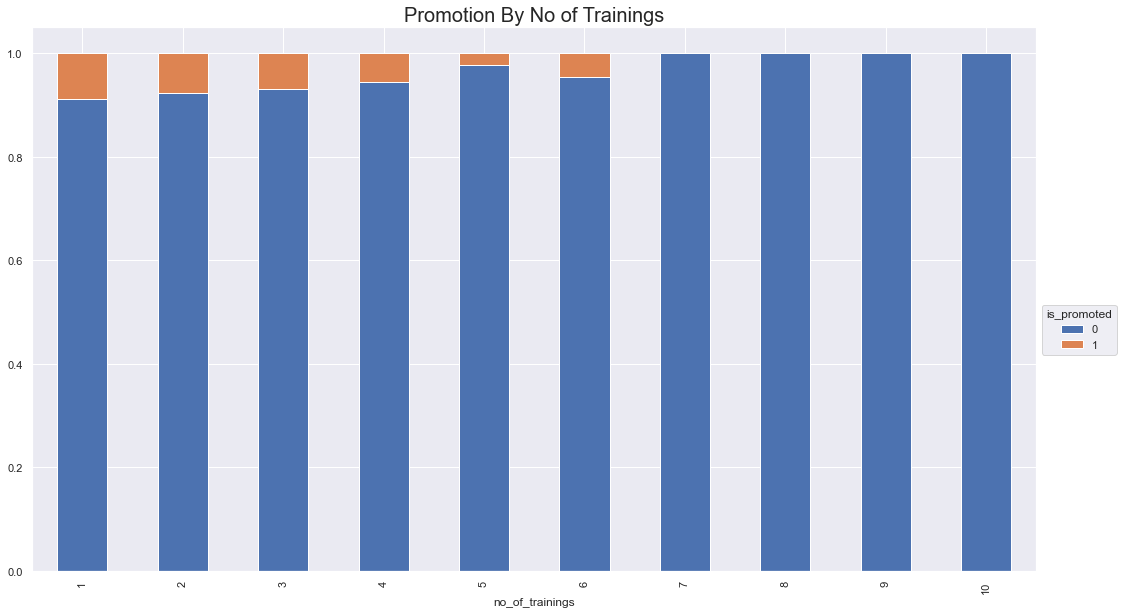

In [189]:
reg = pd.crosstab(df.no_of_trainings,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
plt.title("Promotion By No of Trainings", fontsize = 20)
plt.show()

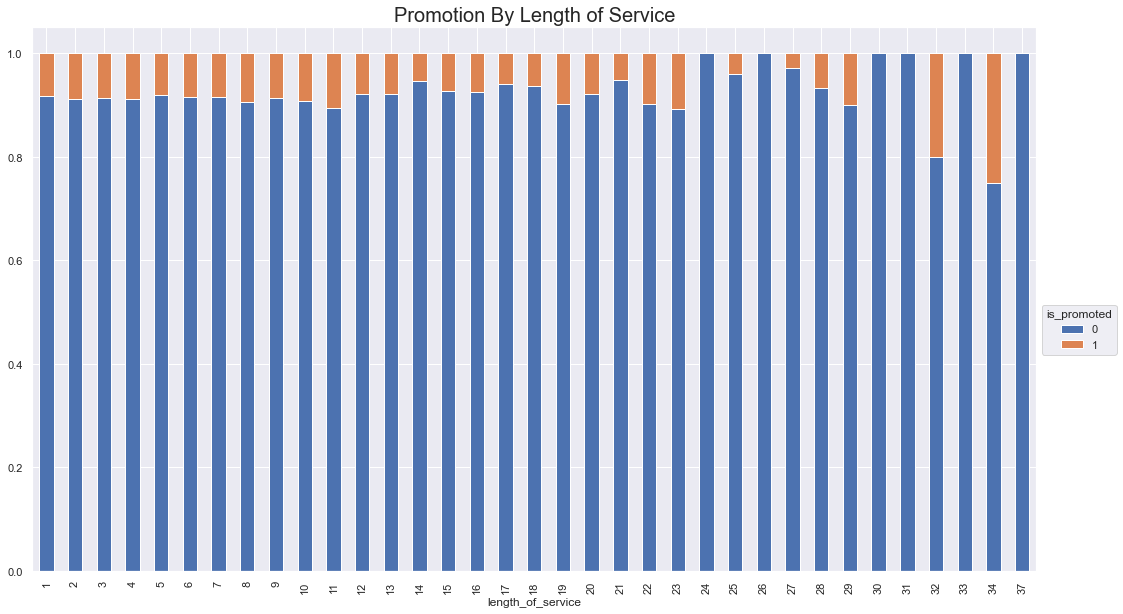

In [190]:
reg = pd.crosstab(df.length_of_service,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
plt.title("Promotion By Length of Service", fontsize = 20)
plt.show()

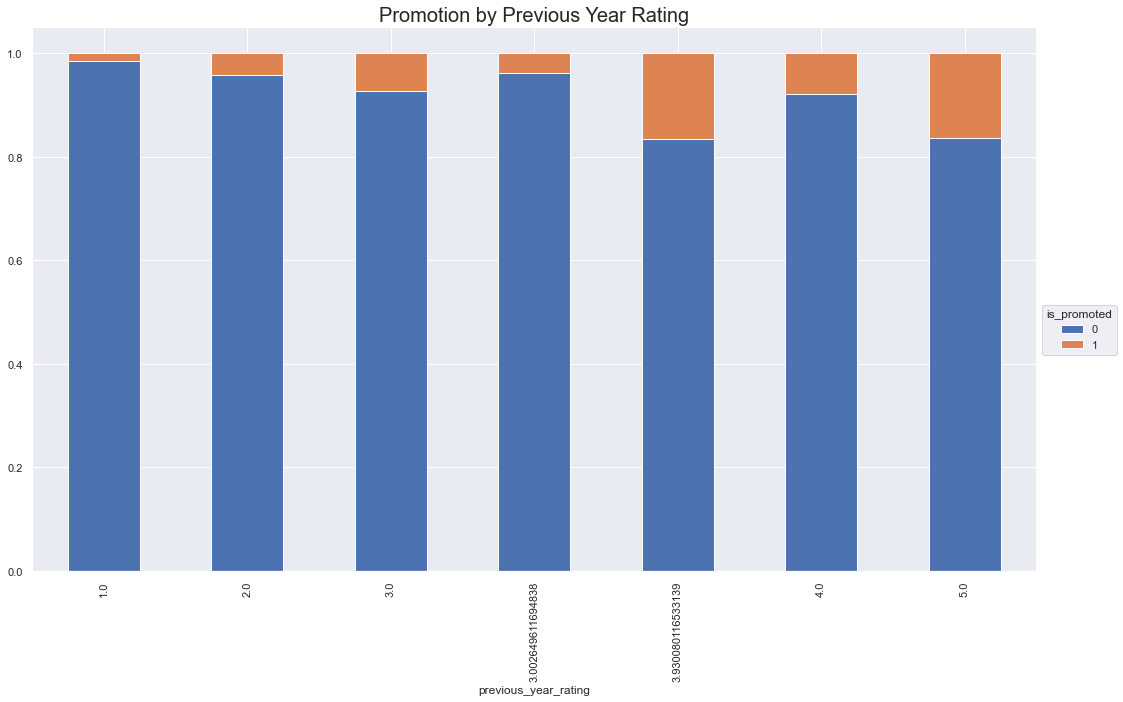

In [194]:
reg = pd.crosstab(df.previous_year_rating,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
plt.title("Promotion by Previous Year Rating", fontsize = 20)
plt.show()

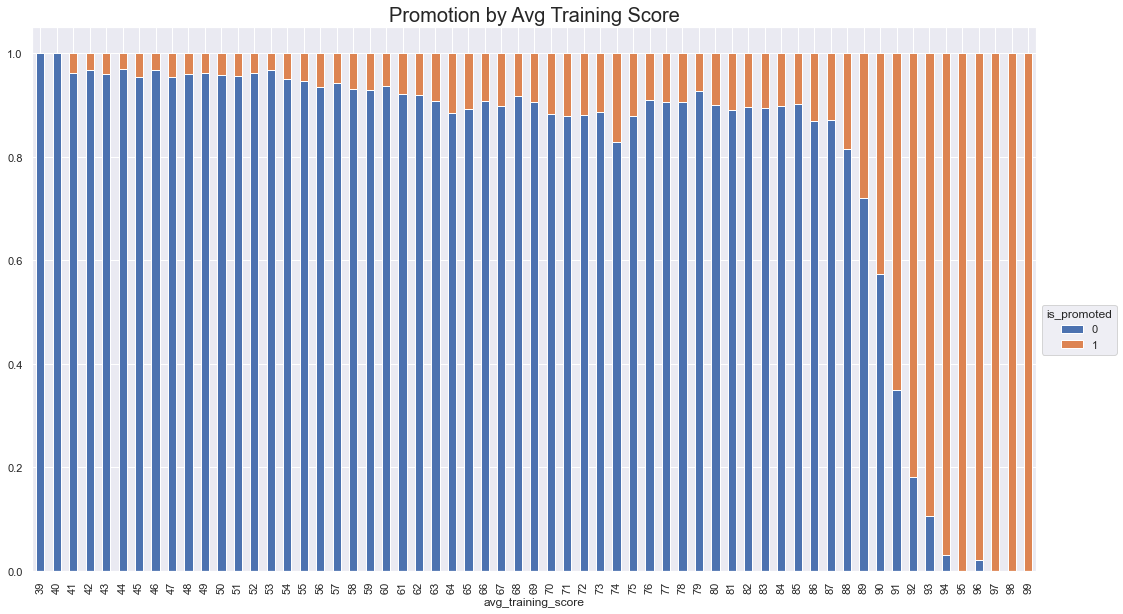

In [195]:
reg = pd.crosstab(df.avg_training_score,df.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
plt.title("Promotion by Avg Training Score", fontsize = 20)
plt.show()

#### Distribution of promotions among people with different Educational backgrounds


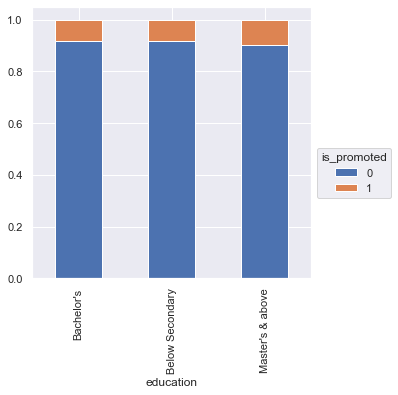

In [139]:
plt.rcParams['figure.figsize'] = [5, 5]
edu = pd.crosstab(df.education,df.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

As we can see the percentages are pretty much the same aross different educational backgrounds.
#### Variation of promotion percentage with respect to gender


In [140]:
pd.crosstab(df.gender,df.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151


There is major differnce in percentages across genders too. Let us check if differnce arises within the departments
#### Variation of promotion percentage with recruitment channel that they have come from

In [141]:

pd.crosstab(df.recruitment_channel,df.is_promoted,normalize='index')


is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013


According to the data, percentage of promotions is higher among the employees who got recruited through referrals.
#### Variation of promotion percentage with respect to KPIs met or not

In [142]:
pd.crosstab(df['KPIs_met >80%'],df.is_promoted,normalize='index')

is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094


Higher percentage of employees got promoted in the group of people whose KPIs_met is greater than 80%.
Let us check if there is any ratio difference across gender within the departments. For this I chose the top 3 highly populated departments.


In [143]:
sales = df[df['department']=='Sales & Marketing']
operations = df[df['department']=='Operations']
technology = df[df['department']=='Technology']
hr = df[df['department']=='HR']
fin = df[df['department']=='Finance']
legal = df[df['department']=='Legal']
RnD = df[df['department']=='R&D']
pd.crosstab(sales.gender,sales.is_promoted,normalize='index')


is_promoted,0,1
gender,,
f,0.944198,0.055802
m,0.924229,0.075771


In [144]:
pd.crosstab(operations.gender,operations.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.905495,0.094505
m,0.912907,0.087093


In [145]:
pd.crosstab(technology.gender,technology.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.900646,0.099354
m,0.887126,0.112874


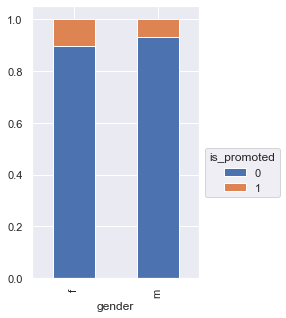

In [146]:

plt.rcParams['figure.figsize'] = [3, 5]
gender = pd.crosstab(RnD.gender,RnD.is_promoted,normalize='index')
gender.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

Slight difference in the ratios can be seen within the departments unlike the ratios calculated without any department barriers.
#### Difference in the percentage of promoted employees with respect to previous year ratings

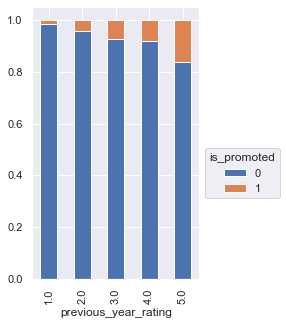

In [147]:
rating = pd.crosstab(df.previous_year_rating,df.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

The ratio of promoted employees increases with previous year rating which is quite obvious.
#### Distribution of average training score

In [148]:
bins = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df['score_binned'] = pd.cut(df['avg_training_score'], bins=bins, labels=labels)
df['score_binned'].value_counts()

50-60     16020
40-50     11996
60-70      9973
80-90      8739
70-80      7494
90-100      579
30-40         7
Name: score_binned, dtype: int64

While most of the employees have score in the range of 50-60, the least score bin has very faint number,
#### Distribution of promoted employees ratio across different score ranges


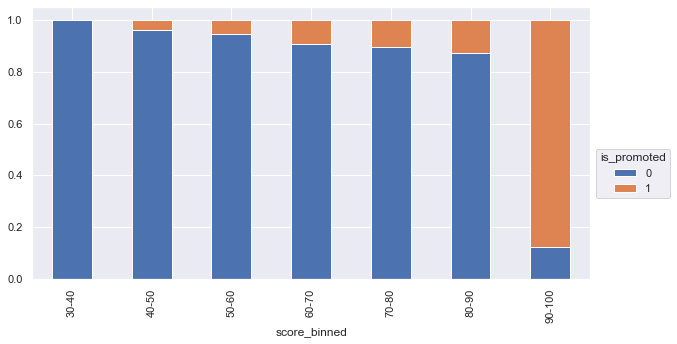

In [149]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df.score_binned,df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

Promotions ratio increases with the score and the ratio is very high in 90-100 range which means getting promoted is highly dependent on the average score.
#### Distribution of promotion ratios with respect to age


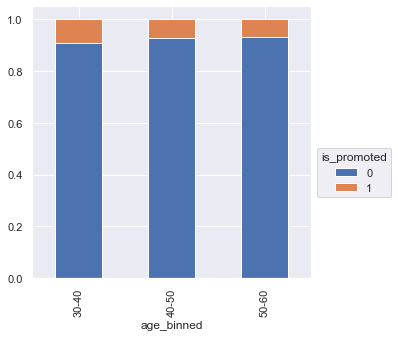

In [150]:
plt.rcParams['figure.figsize'] = [5, 5]
age_bins = [20,30,40,50,60]
age_labels = ['20-30','30-40','40-50','50-60']
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_binned'].value_counts()
age_bin = pd.crosstab(df.age_binned,df.is_promoted,normalize='index')
age_bin.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

Ratio doesn't vary much with age.


# Multivariate Analysis

<AxesSubplot:xlabel='age', ylabel='avg_training_score'>

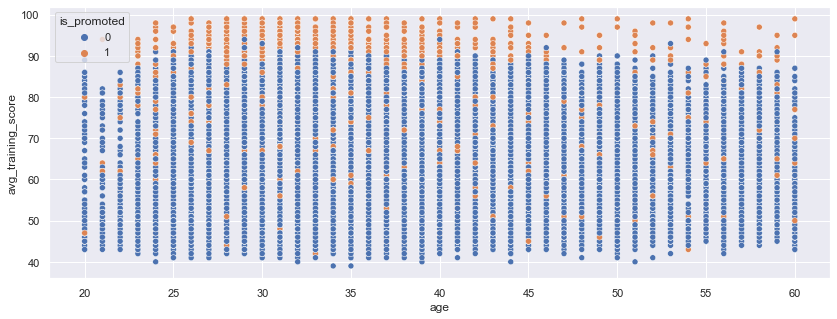

In [151]:

plt.rcParams['figure.figsize'] = [14, 5]
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=df)

This graph reinforces the fact the promotions are majorly dependent on the score and not on age.

<AxesSubplot:>

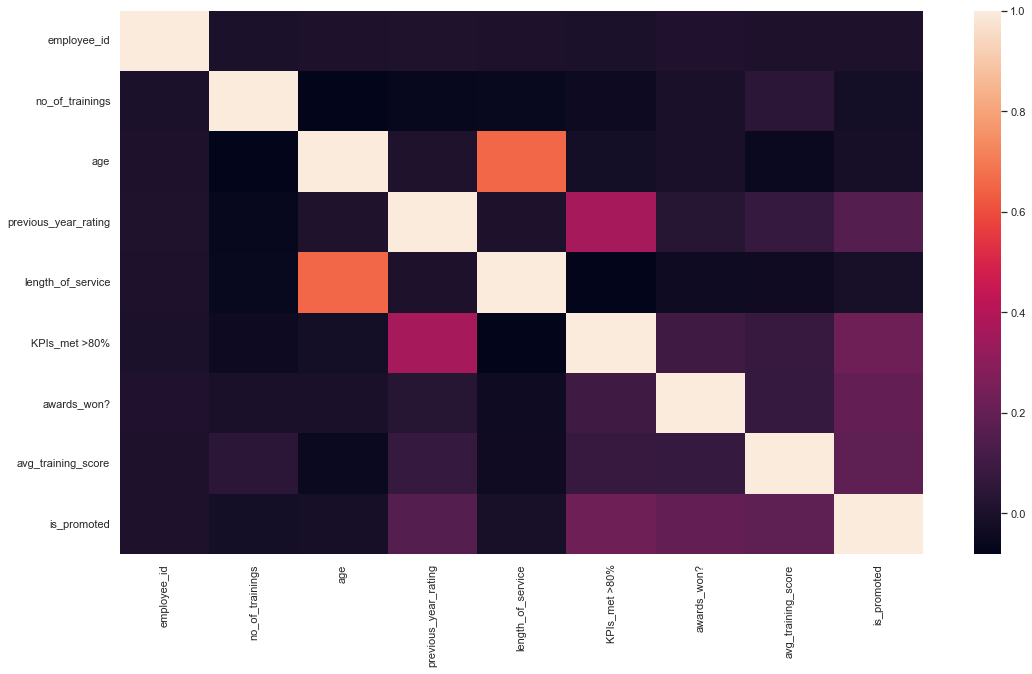

In [196]:
sns.heatmap(df.corr())

#### Mean score of employees with different educational background

In [152]:

df.groupby(["education"])['avg_training_score'].mean()


education
Bachelor's          63.422046
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

Mean training score doesn't vary with education
#### Filling the missing values

In [153]:

df.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
score_binned            False
age_binned               True
dtype: bool

Fill missing values of 'previous_year_rating' with mean based on 'KPIs_met >80%' and 'education' with median based on 'department'

In [154]:
df['previous_year_rating'] = df.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(x.mean()))
df["education"] = df["education"].astype('object')
df['education'] = df.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))

#### Feature engineering Normalize all the numerical features and encode all the categorical features.


In [155]:
scaled_features = df.copy()
col_names = ['no_of_trainings', 'age','previous_year_rating','length_of_service','awards_won?','avg_training_score']
label_names = ['department','gender','recruitment_channel','region']
features = scaled_features[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.get_dummies(scaled_features, columns=label_names, drop_first=True)
scaled_features[col_names] = features
scaled_features.drop(columns=['employee_id','age','education','score_binned','age_binned'],inplace=True)

The transformed features are fit to a Gradient Boosting Algorithm. Grid Search cross validation is used to find the best hyperparameter('n_estimators')

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
 scaled_features.loc[:, scaled_features.columns != 'is_promoted'], scaled_features['is_promoted'], test_size=0.33, random_state=42)


{'n_estimators': 500}
According to the results of grid search, 500 is the optimal number of estimators.


#### Finding feature importances


<AxesSubplot:xlabel='feature', ylabel='importance'>

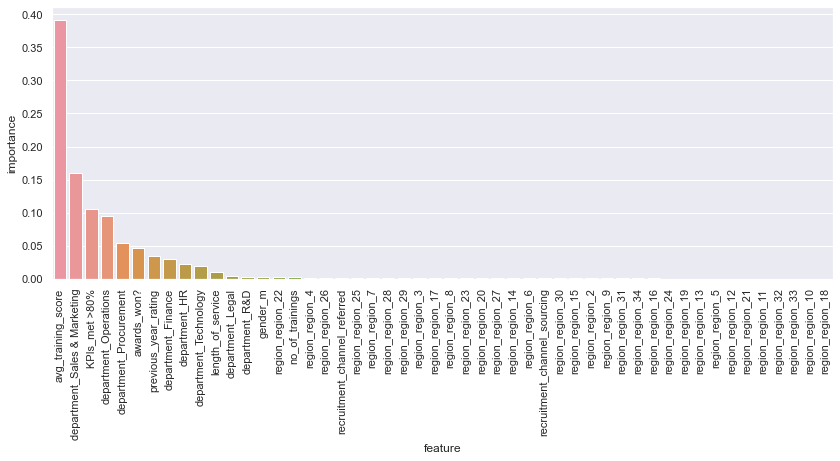

In [157]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importance = {}
for i in range(len(X_train.columns)):
 feature_importance[X_train.columns[i]] = feature_importances[i]
importance_df = pd.DataFrame(list(feature_importance.items()),columns=['feature','importance'])
importance_df = importance_df.sort_values('importance',ascending=False)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize'] = [18, 10]
sns.barplot(x="feature",y="importance",data=importance_df)


The above graph shows the importance of each feature in building the model. Here also average training score takes first place.

In [158]:
pred = grid_search.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred)
'accuracy - '+str(accuracy)


'accuracy - 0.9449881130093437'

In [159]:
f1 = metrics.f1_score(y_test, pred)
'f1 score - '+str(f1)


'f1 score - 0.5134474327628362'

In [160]:
recall = metrics.recall_score(y_test,pred)
'recall - '+str(recall)

'recall - 0.35617367706919945'

In [161]:
precision = metrics.precision_score(y_test,pred)
'precision - '+str(precision)

'precision - 0.9194395796847635'

In [162]:
'precision - 0.9303571428571429'

'precision - 0.9303571428571429'

The model has a high accuracy but F1 score is less because of lesser Recall value. This means that number of False Negatives are higher which might have arised due to
unbalanced classes. Oversampling or undersampling might increase F1 score.

In [163]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Logistic Regression Classifier

In [164]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

C:\Users\gowha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9340963122684801

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16613
           1       0.83      0.15      0.26      1474

    accuracy                           0.93     18087
   macro avg       0.88      0.58      0.61     18087
weighted avg       0.92      0.93      0.91     18087



In [166]:
accuracy_score(y_test, y_pred)

0.9285674794050975

In [167]:
recall_score(y_test, y_pred)

0.1546811397557666

In [168]:
precision_score(y_test, y_pred)

0.8321167883211679

In [169]:
f1_score(y_test, y_pred)

0.2608695652173913

# Decision Tree Classifier

In [170]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

y_pred = dt_clf.predict(X_test)
dt_clf.score(X_test, y_test)

0.9287333443909991

In [171]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16566,    47],
       [ 1242,   232]], dtype=int64)

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16613
           1       0.83      0.16      0.26      1474

    accuracy                           0.93     18087
   macro avg       0.88      0.58      0.61     18087
weighted avg       0.92      0.93      0.91     18087



In [173]:
accuracy_score(y_test, y_pred)

0.9287333443909991

In [174]:
recall_score(y_test, y_pred)

0.15739484396200815

In [175]:
precision_score(y_test, y_pred)

0.8315412186379928

In [176]:
f1_score(y_test, y_pred)

0.26468910439247

# Random Forest Classifier

In [177]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9339304472825787

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16613
           1       0.83      0.16      0.26      1474

    accuracy                           0.93     18087
   macro avg       0.88      0.58      0.61     18087
weighted avg       0.92      0.93      0.91     18087



In [179]:
accuracy_score(y_test, y_pred)

0.9287333443909991

In [180]:
recall_score(y_test, y_pred)

0.15739484396200815

In [181]:
precision_score(y_test, y_pred)

0.8315412186379928

In [182]:
f1_score(y_test, y_pred)

0.26468910439247